# Change runtime type to R

Remember, the first step when opening a Google Colab notebook is to change the runtime type to R from Python. Our code will not work otherwise!

# Install packages for the demonstration

There are some packages that Google Colab does not already have installed. For those, we will need to first install them before we can even load them. Remember, this is like needing to install an app on your phone before you can even use the app.

In [2]:
## Install necessary packages
install.packages("fivethirtyeight")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Load the packages and data into R

At the beginning of any R project and before anything can really begin, we have two steps:

1) Load the packages that we will use.

2) Load the data in R (if it isn't already loaded into the system).

It helps keep the "work space" clean to load all the packages up front so that you know where they are loaded and can easily see which packages are required.

For now, the data we will use is located in R or in some packages. We will learn how to load external data into R at a later date.

In [9]:
## Load several packages that we will use in this demonstration
library(dplyr)
library(ggplot2)
library(readr)
library(tidyr)
library(fivethirtyeight)
#library(magrittr)

# Exploring the 'drinks' dataset

From the fivethirtyeight package, we can load in the 'drinks' data object by using the data() function.


In [4]:
## Load the 'drinks' data object into our environment (R's memory bank)
data(drinks)

After we load a dataset, it's helpful to see what is inside the dataset. Some helpful things to look at and ask yourself regarding a dataset that is new to you.

- In what manner is the data arranged? For example, is each column a variable or is each row a variable? Usually, we want columns to be the variables and the rows are the entities being observed (e.g., each row is a person and each column is that person's score on each variable).

- What type of data are we working with? Common types of data are characters (e.g., categories), logical (e.g., TRUE/FALSE or 1/0), or numeric (i.e., number values).

- What variables are included and how are they measured? In the drinks dataset, we have servings of beer, wine, and spirits (i.e., numeric values) as well as the country (i.e., character values) and total alcohol consumption in litres of pure alcohol (i.e., numeric values).

- How many rows and columns are in the dataset. This helps us know how much data we are working with. For example, each country is on a row and we have 193 rows so it's likely that we have 193 separate countries in this dataset, which also has 4 other variables (columns).

In [5]:
## See the first 6 rows of data with the head() function
head(drinks)

## See the dataset dimensions (i.e., rows by columns, respectively)
## These data have 193 rows by 5 columns
dim(drinks)

country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
<chr>,<int>,<int>,<int>,<dbl>
Afghanistan,0,0,0,0.0
Albania,89,132,54,4.9
Algeria,25,0,14,0.7
Andorra,245,138,312,12.4
Angola,217,57,45,5.9
Antigua & Barbuda,102,128,45,4.9


[1] 193   5

## Asking the question: What do we want to accomplish?

The data we originally import/load is typically going to be messy, the next step is to wrangle (clean) the data. All data cleaning should focus on answering the main question(s) regarding a dataset. Here, maybe we ask a specific question: Out of four major countries (i.e., China, Italy, Saudi Arabia, and the USA), which has the largest consumption of beer, wine, and spirits?

Let's complete three major steps to wrangle our data to meet these needs:

1) Filter the data so that only four countries (i.e., China, Italy, Saudi Arabia, and the USA) are included in the data.

2) Select only the columns we need and drop/ignore the column we do not need.

3) Rename the columns to be simple and easier to read (e.g., for data visualization purposes).

Once that is accomplished, let's view the new data object to see if we were *successful*

## Wrangle the data

Let's put into practice what we wished to achieve above.


In [6]:
## Wrangle the data to answer our question
drinks_smaller <-
  drinks %>%
  filter(country == "USA" | country == "China" | country == "Italy" | country == "Saudi Arabia") %>%
  select(country, beer_servings, spirit_servings, wine_servings) %>%
  rename(beer = beer_servings, spirit = spirit_servings, wine = wine_servings)

## View the dataset, does it look like what we wanted to accomplish?
head(drinks_smaller)

country,beer,spirit,wine
<chr>,<int>,<int>,<int>
China,79,192,8
Italy,85,42,237
Saudi Arabia,0,5,0
USA,249,158,84


## Explaining the code

1) "drinks_smaller <-": The first line of code does two things: (a) we are creating a new object called "drinks_smaller" and (b) we are *assigning* the results of everything that happens after the "<-" to be included in that object.

2) "drinks %>%": this line tells us that we are starting our multiple lines of code from an already created object (drinks, see above) and we are "piping" (i.e., %>%) that object into the next lines of code (i.e., we are going to alter the drinks dataset somehow).

3) " filter(country == "USA" | country == "China" | country == "Italy" | country == "Saudi Arabia") %>% ": This is a long line of code that might seem confusing. The filter() function is the same as filtering in Excel, we are ignoring rows based on something. Here, we only want to keep rows of data where the "country" variable has values of either USA __or__ China __or__ Italy __or__ Saudia Arabia. The vertical line "|" (above my enter key, shift + \ on a Windows keyboard) is interpreted as "or." The pipe operator at the end signifies we are taking the output of this line of code and feeding it into the next line of code as the next input.

4) " select(country, beer_servings, spirit_servings, wine_servings) %>% ": Whereas filter() will ignore some rows based on a logical input, select() will extract the specified columns and ignore the others. This reduced (i.e., some rows of data ignored in line 3, some columns ignored in line 4) dataset has a pipe operator at the end signifying that the output thusfar will be used as the input for the next line of code.

5) " rename(beer = beer_servings, spirit = spirit_servings, wine = wine_servings) ": Here, the rename() function is change the column names of the specified variables into the newly designated column names (e.g., beer-servings is changed to beer).

End Result: Notice in the output from the data wrangling, we only see 4 rows (countries), the 4 selected columns, and the column names are simple. It is cleaned!


# Tidy the 'drinks' data

In R, to 'tidy' the data means to put it into a format that is usable in the types of analyses and visualizations we want to complete. We have clear formatting rules that we want to include in our 'tidy' data:

1) Each *variable* (e.g., country is a variable) is represented as a single column.

2) Each *observation* (e.g., USA is an observation of country) is represented as a single row.

Let's think about this 'drinks' data object, we have three types of variables:

1) The *categorical* variable of COUNTRY (e.g., USA, Italy).

2) The *categorical* variable of beverage type (i.e., beer, wine, and spirit).

3) The *numeric* variable of beverage servings (e.g., 42 servings).

However, the actual dataset does not have a column for beverage type nor a column for beverage servings!

## The pivot_longer() function to tidy

Right now, the categorical beverage type (beer, wine, spirit) is crossed with the numeric number of servings. The goal of the pivot_longer() function is to separate these intermingled variables into their own separate columns.

This pivot_longer() function is hard to use so let's describe the arguments in it.

- names_to: We are converting *some categorical variable* to be its own column. **This argument specifies the name of a new _categorical_ variable (column) we are creating**.

- values_to: Recall that we have beverage servings separated across the multiple beverage type columns. **This argument specifies the the name of a new _numeric_ variable (column) we are creating**.

- cols: **This argument specifies which current columns are going to be converted into the 'tidy' format**.

## Applying the pivot_longer() function

Because we will use this 'tidy' data in later analyses/visualizations, let's create another object to save our tidy-ing.

Note that the c() function is **c**ombining those three values (i.e., beer, spirit, wine) to be interpreted as one big input for the cols argument.

In [7]:
## Convert our dataset to the tidy version
drinks_tidy <-
  drinks_smaller %>%
  pivot_longer(names_to = "type",
               values_to = "servings",
               cols = c(beer, spirit, wine))

## View the first several rows of the new tidy data
head(drinks_tidy)

country,type,servings
<chr>,<chr>,<int>
China,beer,79
China,spirit,192
China,wine,8
Italy,beer,85
Italy,spirit,42
Italy,wine,237


## Bar graph of country beverage consumption

From these tidy data, where each column is a distinct variable, we can more easily analyze the data and visualize it. Let's do just that!

The bar graph we want should have the following features:

1) The *country* variable is located on the x-axis

2) The number of *servings* of beverage consumption is located on the y-axis

3) There are separate (grouped) bars based on the *type* of beverage

In the aesthetics function, the 'fill' argument is essentially mapping our 3rd variable as separate bars for each country.

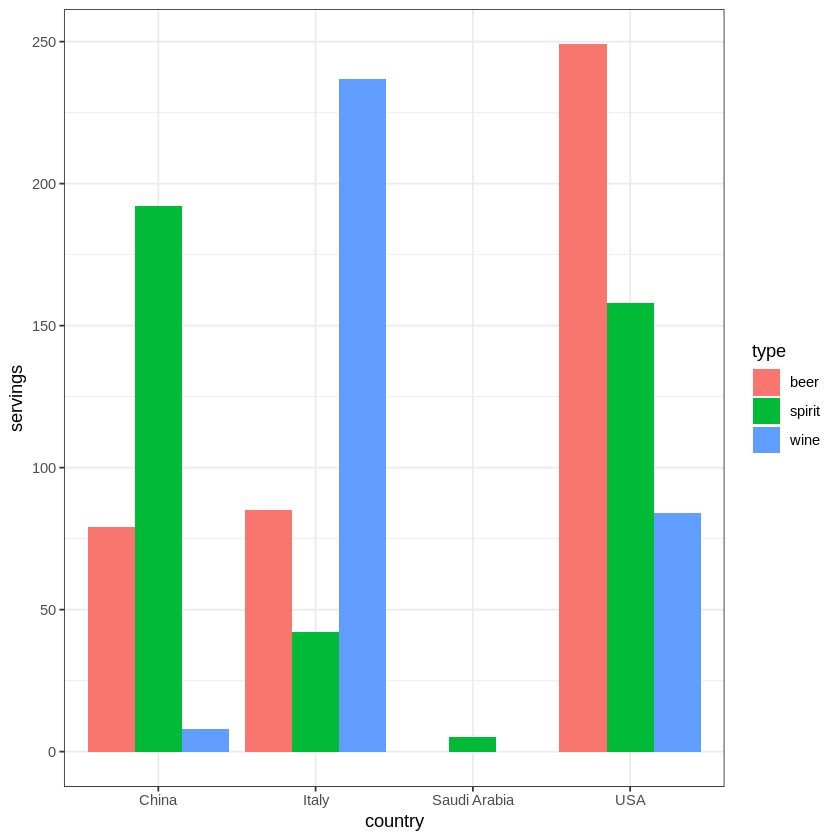

In [8]:
## Bar graph of the country, beverage, and servings
ggplot(data = drinks_tidy, mapping = aes(x = country, y = servings, fill = type)) +
  geom_col(position = "dodge") +
  theme_bw()

## Alcohol consumption by country

Now that our data are cleaned and we created a visualization, we can interpret our dataset. These data suggest that alcohol consumption is not created equal. Italy and the USA have similar levels of alcohol consumption but Italy greatly prefers wine and USA greatly prefers beer. China drinks low volumes of wine but more spirits than the other 3. Saudia Arabia, a country abiding by religious tenants that forbid alcohol, unsurprisingly consumes few servings of alcohol.

# Tidy another dataset

Practice makes perfect so let's try to convert our 'dem_score' dataset to a tidy format.


## The central research question

We don't just wrangle data mindlessly, we have goals in mind for needing to wrangle and tidy data!

The question:

**How has the democracy score for Nicaragua and Guatemala changed across time?**

## The data structure

Before we wrangle and tidy the data, let's see what our data look like

In [10]:
## Load in the data that are stored on a specific website
dem_score <- read_csv("https://moderndive.com/data/dem_score.csv")

## See the first few rows of the dataset
head(dem_score)

Rows: 96 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): country
dbl (9): 1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


country,1952,1957,1962,1967,1972,1977,1982,1987,1992
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Albania,-9,-9,-9,-9,-9,-9,-9,-9,5
Argentina,-9,-1,-1,-9,-9,-9,-8,8,7
Armenia,-9,-7,-7,-7,-7,-7,-7,-7,7
Australia,10,10,10,10,10,10,10,10,10
Austria,10,10,10,10,10,10,10,10,10
Azerbaijan,-9,-7,-7,-7,-7,-7,-7,-7,1


The data have a few things included:

- A *categorical* country variable

- A *numeric* year, which is currently across separate columns (uh oh)

- A *numeric* democracy score, which is currently spread out across years (uh oh)

As we can see, there are two things we wish to change:

1) Create a 'year' variable as its own column

2) Create a 'democracy_score' variable as its own column

## Wrangle and tidy the data

We have many countries in our data so let's only include the two countries of interest: Nicaragua and Guatemala

In [11]:
## Filter the rows to only include 2 countries
dem_clean <-
  dem_score %>%
  filter(country == "Nicaragua" | country == "Guatemala")

## See the first few rows of the dataset to see if we were successful
head(dem_clean)

country,1952,1957,1962,1967,1972,1977,1982,1987,1992
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Guatemala,2,-6,-5,3,1,-3,-7,3,3
Nicaragua,-8,-8,-8,-8,-8,-8,-5,-1,6


These data are mostly easy to tidy, for now we just kept rows in our dataset (using the filter function) where the country variable was either Guatemala or Nicaragua. We removed/ignored the others.

Now we can apply the pivot_longer() function to create our two new columns (variables).


In [13]:
## Convert the data to our tidy format
dem_tidy <-
  dem_clean %>%
  pivot_longer(names_to = "year",
               values_to = "democracy_score",
               cols = c('1952', '1957', '1962', '1967', '1972', '1977', '1982', '1987', '1992'))

## See the first several rows of the data to see if we were successful
head(dem_tidy)


country,year,democracy_score
<chr>,<chr>,<dbl>
Guatemala,1952,2
Guatemala,1957,-6
Guatemala,1962,-5
Guatemala,1967,3
Guatemala,1972,1
Guatemala,1977,-3


## Explaining the pivot_longer() code

Okay, let's break down these lines of R code:

**Line 1**: `dem_tidy <-`

- `dem_tidy`: This part creates a new variable (or object, more accurately in R) called d`em_tidy`. Think of it like a container where you're about to store the results of your data manipulation.

- `<-`: This is the assignment operator in R. It takes whatever is calculated on the right side of the arrow and stores it into the variable on the left side (in this case, dem_tidy).

**Line 2**: `dem_clean %>%`

- `dem_clean`: This is assumed to be an existing data frame (like a table) that you've created or loaded earlier in your code.
- `%>%`: This is the pipe operator. It takes the output of the previous step (dem_clean) and "pipes" it as the input to the next step (pivot_longer). It's a way to chain operations together for cleaner code.

**Lines 3-6**: `pivot_longer(...)`

This is the core of the code. It's using the pivot_longer function from the tidyr package in R to reshape the data from wide format to long format.

- `names_to = "year"`: This argument tells pivot_longer to create a new column called "year". The values in this column will be taken from the column names of the original data that you specify in the cols argument.

- `values_to = "democracy_score"`: This argument tells pivot_longer to create another new column called "democracy_score". The values in this column will be the actual data from the cells in the original data frame that correspond to the year and country.

- `cols = c('1952', '1957', ..., '1992')`: This is where you specify the columns in dem_clean that you want to "unpivot" or reshape. In this case, it's the columns representing the years from 1952 to 1992. The `c()` function is used to create a vector containing these year values.

**In simpler terms**:

Imagine you have a spreadsheet where each row is a country, and you have separate columns for the democracy score in each year (1952, 1957, etc.). This code takes that "wide" data and transforms it into a "long" format. In the long format, you'll have:

A column for "country" (which was already there).
A column for "year" (created from the old column names).
A column for "democracy_score" (containing the actual scores).

## Visualize the change in democracy: Line graph

We can now use our wrangled and tidy data to create a simple visualization to answer our central question: How has the democracy score for Nicaragua and Guatemala changed over time?


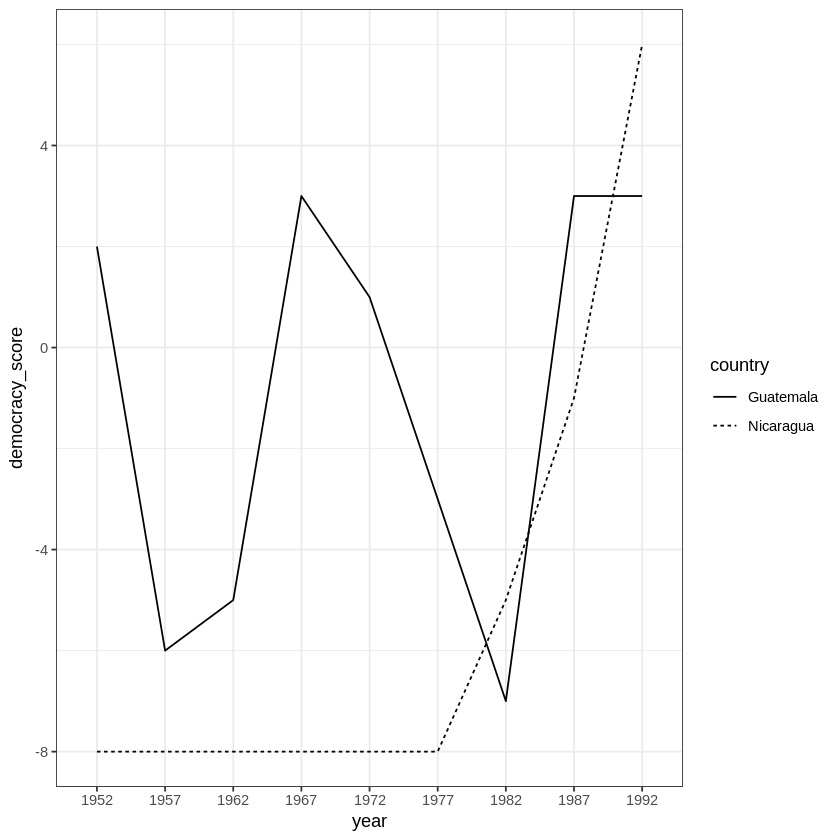

In [14]:
ggplot(data = dem_tidy, mapping = aes(x = year, y = democracy_score,
                                      group = country, linetype = country)) +
  geom_line() +
  theme_bw()

## Answering the central question: Democracy scores across time

Recall our central question with this dataset:

**How has the democracy score for Nicaragua and Guatemala changed across time?**

Based on the line graph, Guatemala has seen high volatility in its Democracy score between 1952 and 1992. Nicaragua has a very different trajectory, they began and stayed at a very low Democracy score but skyrocketed after 1977.